In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Helper function to fetch dataframe and adjust columns

def fetch_df(url):
  
  df = pd.read_html(url)[0]
  
  
  #Converting multi-index columns to single columns
  c = []
  for a,b in df.columns:
    if 'Unnamed' in a:
      c.append(b)
    else:
      c.append(a+' ' + b)
  df.columns = c
  return df

In [3]:
gca = fetch_df('https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats#stats_gca')

In [4]:
pass_types = fetch_df('https://fbref.com/en/comps/Big5/passing_types/players/Big-5-European-Leagues-Stats#stats_passing_types')

In [5]:
defense = fetch_df('https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats#stats_defense')

In [6]:
possession = fetch_df('https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats#stats_possession')

In [7]:
passing = fetch_df('https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats#stats_passing')

In [8]:
shooting = fetch_df('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats#stats_shooting')

In [9]:
#Check whether all the dataframes have the same number of rows
pass_types.shape[0] == defense.shape[0] == possession.shape[0] == passing.shape[0] == gca.shape[0] == shooting.shape[0]

True

In [10]:
#For retreiving average possession values of the player's team
team_stats = fetch_df('https://fbref.com/en/comps/Big5/possession/squads/Big-5-European-Leagues-Stats#stats_squads_possession_for')

In [11]:
team_poss = team_stats[['Squad', 'Poss']]

In [12]:
#Finding common columns between dataframes
passing.columns & gca.columns & defense.columns & shooting.columns & possession.columns & pass_types.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  


Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Matches'],
      dtype='object')

In [13]:
#Dataframes contain multiple rows which are used to show column headings in orignal table on the website after certain number of entries

def clean_df(df):

  df['Player'] = df['Player'].astype('string')
  row_indices = df[df['Player'] == 'Player'].index
  df.drop(row_indices, axis=0, inplace=True)
  df.reset_index(drop=True, inplace=True)

  #Remove unneeded columns
  column_list = ['Rk', 'Nation', 'Comp', 'Age', 'Born', 'Matches']
  df.drop(column_list, axis=1, inplace=True)
  return df

In [14]:
#Creating a list of dataframes and passing it for cleaning
df_list = [pass_types, defense, possession, passing, shooting, gca]

for item in df_list:
  item = clean_df(item)

In [15]:
#Saving player names with orignal index 
orignal_index = pd.DataFrame([defense['Player'], pd.Series(defense.index)], columns=['Player', 'Index']).copy()

In [16]:
defense.head(2)

,Player,Pos,Squad,90s,Tackles Tkl,Tackles TklW,Tackles Def 3rd,Tackles Mid 3rd,Tackles Att 3rd,Vs Dribbles Tkl,...,Pressures Mid 3rd,Pressures Att 3rd,Blocks Blocks,Blocks Sh,Blocks ShSv,Blocks Pass,Int,Tkl+Int,Clr,Err
0,Max Aarons,DF,Norwich City,32.0,69,37,50,19,0,37,...,140,39,86,22,1,64,56,125,70,0
1,Yunis Abdelhamid,DF,Reims,33.1,62,46,41,20,1,13,...,170,29,62,26,2,36,103,165,106,0


In [17]:
#Adding average possession of the player's team to every player's row

def apply_possession(x):

  for j in range(len(team_stats)):
    if team_stats['Squad'].iloc[j] == x['Squad']:
      return team_stats['Poss'].iloc[j]

In [18]:
defense['Team Possession'] = defense.apply(lambda row: apply_possession(row), axis=1)

In [19]:
defense.head(4).iloc[:,15:]

,Pressures %,Pressures Def 3rd,Pressures Mid 3rd,Pressures Att 3rd,Blocks Blocks,Blocks Sh,Blocks ShSv,Blocks Pass,Int,Tkl+Int,Clr,Err,Team Possession
0,26.0,255,140,39,86,22,1,64,56,125,70,0,42.5
1,35.9,252,170,29,62,26,2,36,103,165,106,0,42.2
2,27.9,197,336,108,27,1,0,26,51,106,15,0,50.0
3,28.2,304,502,112,55,3,0,52,84,201,11,0,44.3


In [20]:
defense.columns

Index(['Player', 'Pos', 'Squad', '90s', 'Tackles Tkl', 'Tackles TklW',
       'Tackles Def 3rd', 'Tackles Mid 3rd', 'Tackles Att 3rd',
       'Vs Dribbles Tkl', 'Vs Dribbles Att', 'Vs Dribbles Tkl%',
       'Vs Dribbles Past', 'Pressures Press', 'Pressures Succ', 'Pressures %',
       'Pressures Def 3rd', 'Pressures Mid 3rd', 'Pressures Att 3rd',
       'Blocks Blocks', 'Blocks Sh', 'Blocks ShSv', 'Blocks Pass', 'Int',
       'Tkl+Int', 'Clr', 'Err', 'Team Possession'],
      dtype='object')

In [21]:
#Choosing metrics to be possession adjusted
#imp_defense_metrics = ['Tackles Def 3rd', 'Tackles Mid 3rd','Tackles Att 3rd', Pressures Def 3rd', 'Pressures Mid 3rd', 'Pressures Att 3rd', 'Blocks Blocks', 'Int', 'Clr']
imp_defense_metrics = ['Tackles Tkl', 'Tackles TklW',
       'Tackles Def 3rd', 'Tackles Mid 3rd', 'Tackles Att 3rd',
       'Vs Dribbles Tkl', 'Vs Dribbles Att', 'Vs Dribbles Tkl%',
       'Vs Dribbles Past', 'Pressures Press', 'Pressures Succ', 'Pressures %',
       'Pressures Def 3rd', 'Pressures Mid 3rd', 'Pressures Att 3rd',
       'Blocks Blocks', 'Blocks Sh', 'Blocks ShSv', 'Blocks Pass', 'Int',
       'Tkl+Int', 'Clr']
                        

In [22]:
#Creating a copy of the orignal defense dataframe
df = defense.copy()
df[imp_defense_metrics] = df[imp_defense_metrics].astype('float')
df['Team Possession'] = df['Team Possession'].astype('float')

In [23]:
#-0.1*(x-50)
sigmoid = -0.1*(df['Team Possession'] - 50.0)

#Tackles * 2/(1 + e^(..)
denominator = 1.0 + np.exp(sigmoid)

In [24]:
#Determining the shape for creating np.ones array
(np.ones((denominator.shape[0], df[imp_defense_metrics].shape[1]))).shape

(2921, 22)

In [25]:
#Creating a similar sized array for perforning division with the dataframe
denominator_term = np.multiply(np.array(denominator).reshape(2921,1),(np.ones((denominator.shape[0], df[imp_defense_metrics].shape[1]))))

In [26]:
denominator_term.shape

(2921, 22)

In [27]:
pAdj_metrics = ((df[imp_defense_metrics] * 2.0)/denominator_term).copy()

In [28]:
#Cleaning column names

column_list = []
for item in pAdj_metrics.columns:
  column_list.append('pAdj ' + item)

pAdj_metrics.columns = column_list

In [29]:
pAdj_metrics.head(2)

,pAdj Tackles Tkl,pAdj Tackles TklW,pAdj Tackles Def 3rd,pAdj Tackles Mid 3rd,pAdj Tackles Att 3rd,pAdj Vs Dribbles Tkl,pAdj Vs Dribbles Att,pAdj Vs Dribbles Tkl%,pAdj Vs Dribbles Past,pAdj Pressures Press,...,pAdj Pressures Def 3rd,pAdj Pressures Mid 3rd,pAdj Pressures Att 3rd,pAdj Blocks Blocks,pAdj Blocks Sh,pAdj Blocks ShSv,pAdj Blocks Pass,pAdj Int,pAdj Tkl+Int,pAdj Clr
0,44.273340,23.740776,32.082130,12.191209,0.00000,23.740776,37.215271,40.936798,13.474495,278.472889,...,163.618863,89.829964,25.024061,55.181264,14.116137,0.641643,41.065127,35.931986,80.205325,44.914982
1,38.975666,28.917430,25.774231,12.572795,0.62864,8.172317,16.973274,30.237573,8.800957,283.516537,...,158.417223,106.868761,18.230553,38.975666,16.344634,1.257280,22.631032,64.749897,103.725562,66.635816


In [30]:
#Dropping orignal values and replacing them with possession adjusted values

pAdj_defense = pd.concat([df.drop(imp_defense_metrics, axis=1), pAdj_metrics], axis=1).copy()
pAdj_defense.head(2)

,Player,Pos,Squad,90s,Err,Team Possession,pAdj Tackles Tkl,pAdj Tackles TklW,pAdj Tackles Def 3rd,pAdj Tackles Mid 3rd,...,pAdj Pressures Def 3rd,pAdj Pressures Mid 3rd,pAdj Pressures Att 3rd,pAdj Blocks Blocks,pAdj Blocks Sh,pAdj Blocks ShSv,pAdj Blocks Pass,pAdj Int,pAdj Tkl+Int,pAdj Clr
0,Max Aarons,DF,Norwich City,32.0,0,42.5,44.273340,23.740776,32.082130,12.191209,...,163.618863,89.829964,25.024061,55.181264,14.116137,0.641643,41.065127,35.931986,80.205325,44.914982
1,Yunis Abdelhamid,DF,Reims,33.1,0,42.2,38.975666,28.917430,25.774231,12.572795,...,158.417223,106.868761,18.230553,38.975666,16.344634,1.257280,22.631032,64.749897,103.725562,66.635816


In [31]:
#Finding common columns

passing.columns & gca.columns & pAdj_defense.columns & shooting.columns & possession.columns & pass_types.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['Player', 'Pos', 'Squad', '90s'], dtype='object')

In [32]:
#Having retrieved the possession stats, its time to drop 'Squad' column
def column_fitting(df):
  df.drop('Squad', axis=1, inplace=True)
  return df

In [33]:
df_list = [pass_types, pAdj_defense, possession, passing, shooting, gca]

for i in df_list:
  i = column_fitting(i)

pAdj_defense.head(2)

,Player,Pos,90s,Err,Team Possession,pAdj Tackles Tkl,pAdj Tackles TklW,pAdj Tackles Def 3rd,pAdj Tackles Mid 3rd,pAdj Tackles Att 3rd,...,pAdj Pressures Def 3rd,pAdj Pressures Mid 3rd,pAdj Pressures Att 3rd,pAdj Blocks Blocks,pAdj Blocks Sh,pAdj Blocks ShSv,pAdj Blocks Pass,pAdj Int,pAdj Tkl+Int,pAdj Clr
0,Max Aarons,DF,32.0,0,42.5,44.273340,23.740776,32.082130,12.191209,0.00000,...,163.618863,89.829964,25.024061,55.181264,14.116137,0.641643,41.065127,35.931986,80.205325,44.914982
1,Yunis Abdelhamid,DF,33.1,0,42.2,38.975666,28.917430,25.774231,12.572795,0.62864,...,158.417223,106.868761,18.230553,38.975666,16.344634,1.257280,22.631032,64.749897,103.725562,66.635816


In [34]:
#Combining all the dataframes and removing duplicate columns
full_df = pd.concat([shooting, passing, pass_types, gca, pAdj_defense, possession], axis=1).copy()
full_df = full_df.loc[:,~full_df.columns.duplicated()].copy()

In [35]:
#DataFrame consisting of all attributes of players
full_df.head(1)

,Player,Pos,90s,Standard Gls,Standard Sh,Standard SoT,Standard SoT%,Standard Sh/90,Standard SoT/90,Standard G/Sh,...,Carries PrgDist,Carries Prog,Carries 1/3,Carries CPA,Carries Mis,Carries Dis,Receiving Targ,Receiving Rec,Receiving Rec%,Receiving Prog
0,Max Aarons,DF,32.0,0,13,2,15.4,0.41,0.06,0.00,...,3893,174,53,13,27,30,1153,1037,89.9,41


In [36]:
pAdj_defense.columns

Index(['Player', 'Pos', '90s', 'Err', 'Team Possession', 'pAdj Tackles Tkl',
       'pAdj Tackles TklW', 'pAdj Tackles Def 3rd', 'pAdj Tackles Mid 3rd',
       'pAdj Tackles Att 3rd', 'pAdj Vs Dribbles Tkl', 'pAdj Vs Dribbles Att',
       'pAdj Vs Dribbles Tkl%', 'pAdj Vs Dribbles Past',
       'pAdj Pressures Press', 'pAdj Pressures Succ', 'pAdj Pressures %',
       'pAdj Pressures Def 3rd', 'pAdj Pressures Mid 3rd',
       'pAdj Pressures Att 3rd', 'pAdj Blocks Blocks', 'pAdj Blocks Sh',
       'pAdj Blocks ShSv', 'pAdj Blocks Pass', 'pAdj Int', 'pAdj Tkl+Int',
       'pAdj Clr'],
      dtype='object')

In [37]:
#Taking useful features based on the reference website

useful_features = ['Player', '90s', 'Pos',
                   'Short Att', 'Medium Att', 'Long Att', 'Total PrgDist', 'KP', '1/3', 'PPA', 'Prog', 
                   'Pass Types Crs', 'Pass Types TB', 'Pass Types Sw',
                   'Touches Touches', 'Dribbles Att', 'Carries Carries', 'Receiving Rec',
                   'Standard Sh',
                   'pAdj Pressures Def 3rd', 'pAdj Pressures Mid 3rd', 'pAdj Pressures Att 3rd', 'pAdj Blocks Blocks', 'pAdj Int', 'pAdj Clr', 'pAdj Tackles Def 3rd',
                    'pAdj Tackles Mid 3rd', 'pAdj Tackles Att 3rd'
                   ] #'Carries PrgDist', 'Carries 1/3', 'Carries CPA', 'SCA SCA90', 'SCA Types PassLive'


print(len(useful_features))

#Creating dataframe of useful features and making an extra copy
data = full_df[useful_features].copy()
#data.head(1)
model_df = data[useful_features].copy()
#model_df.head(1)

28


In [38]:
float_features = ['90s',
                   'Short Att', 'Medium Att', 'Long Att', 'Total PrgDist', 'KP', '1/3', 'PPA', 'Prog', 
                   'Pass Types Crs', 'Pass Types TB', 'Pass Types Sw',
                   'Touches Touches', 'Dribbles Att', 'Carries Carries', 'Receiving Rec',
                   'Standard Sh',
                   'pAdj Pressures Def 3rd', 'pAdj Pressures Mid 3rd', 'pAdj Pressures Att 3rd', 'pAdj Blocks Blocks', 'pAdj Int', 'pAdj Clr', 'pAdj Tackles Def 3rd',
                    'pAdj Tackles Mid 3rd', 'pAdj Tackles Att 3rd'
                   ] #'Carries PrgDist', 'Carries 1/3', 'Carries CPA', 'SCA SCA90', 'SCA Types PassLive',

In [39]:
#Converting object features to float
model_df[float_features] = model_df[float_features].astype('float')

#Converting player position series to string column
model_df['Pos'] = model_df['Pos'].astype('string')

In [40]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  2921 non-null   string 
 1   90s                     2921 non-null   float64
 2   Pos                     2921 non-null   string 
 3   Short Att               2921 non-null   float64
 4   Medium Att              2921 non-null   float64
 5   Long Att                2921 non-null   float64
 6   Total PrgDist           2921 non-null   float64
 7   KP                      2921 non-null   float64
 8   1/3                     2921 non-null   float64
 9   PPA                     2921 non-null   float64
 10  Prog                    2921 non-null   float64
 11  Pass Types Crs          2921 non-null   float64
 12  Pass Types TB           2921 non-null   float64
 13  Pass Types Sw           2921 non-null   float64
 14  Touches Touches         2921 non-null   

In [41]:
#Creating denominator for converting the table to per90 stats
denominator_per_90 = np.multiply(np.array(model_df['90s']).reshape(2921,1),np.ones([2921,25]))

In [42]:
#per_90_df = model_df.copy()
#per_90_df.columns

In [43]:
per_90_features = ['Short Att', 'Medium Att', 'Long Att',
       'Total PrgDist', 'KP', '1/3', 'PPA', 'Prog', 'Pass Types Crs',
       'Pass Types TB', 'Pass Types Sw', 'Touches Touches', 'Dribbles Att',
       'Carries Carries', 'Receiving Rec', 'Standard Sh',
       'pAdj Pressures Def 3rd', 'pAdj Pressures Mid 3rd',
       'pAdj Pressures Att 3rd', 'pAdj Blocks Blocks', 'pAdj Int', 'pAdj Clr',
       'pAdj Tackles Def 3rd', 'pAdj Tackles Mid 3rd', 'pAdj Tackles Att 3rd'] #'Carries PrgDist', 'Carries 1/3', 'Carries CPA', 'SCA SCA90', 'SCA Types PassLive', 

In [44]:
model_df[per_90_features] = (model_df[model_df.columns[~model_df.columns.isin(['Player', 'Pos', '90s'])]] / denominator_per_90).copy()

In [45]:
model_df.head(1)

,Player,90s,Pos,Short Att,Medium Att,Long Att,Total PrgDist,KP,1/3,PPA,...,Standard Sh,pAdj Pressures Def 3rd,pAdj Pressures Mid 3rd,pAdj Pressures Att 3rd,pAdj Blocks Blocks,pAdj Int,pAdj Clr,pAdj Tackles Def 3rd,pAdj Tackles Mid 3rd,pAdj Tackles Att 3rd
0,Max Aarons,32.0,DF,19.4375,17.0,6.78125,214.8125,0.59375,1.5625,1.125,...,0.40625,5.113089,2.807186,0.782002,1.724414,1.122875,1.403593,1.002567,0.380975,0.0


In [46]:
#Extracting rows containing midfielders
midfielders = model_df[model_df['Pos'].str.contains('MF')].copy()

In [47]:
#Extracting players with minimum 900+ of playing time
threshold = midfielders[midfielders['90s'] <= 10.0].index
midfielders = midfielders.drop(threshold, axis=0).copy()
midfielders.head(1)

,Player,90s,Pos,Short Att,Medium Att,Long Att,Total PrgDist,KP,1/3,PPA,...,Standard Sh,pAdj Pressures Def 3rd,pAdj Pressures Mid 3rd,pAdj Pressures Att 3rd,pAdj Blocks Blocks,pAdj Int,pAdj Clr,pAdj Tackles Def 3rd,pAdj Tackles Mid 3rd,pAdj Tackles Att 3rd
2,Salis Abdul Samed,27.4,MF,24.051095,27.226277,7.810219,184.379562,0.547445,2.810219,0.474453,...,0.656934,7.189781,12.262774,3.941606,0.985401,1.861314,0.547445,0.912409,0.912409,0.182482


In [48]:
#Resetting index
midfielders = midfielders.reset_index(drop=True)
midfielders.head(1)

,Player,90s,Pos,Short Att,Medium Att,Long Att,Total PrgDist,KP,1/3,PPA,...,Standard Sh,pAdj Pressures Def 3rd,pAdj Pressures Mid 3rd,pAdj Pressures Att 3rd,pAdj Blocks Blocks,pAdj Int,pAdj Clr,pAdj Tackles Def 3rd,pAdj Tackles Mid 3rd,pAdj Tackles Att 3rd
0,Salis Abdul Samed,27.4,MF,24.051095,27.226277,7.810219,184.379562,0.547445,2.810219,0.474453,...,0.656934,7.189781,12.262774,3.941606,0.985401,1.861314,0.547445,0.912409,0.912409,0.182482


In [49]:
#Creating training set consisting of all the numeric features
X = midfielders[per_90_features]
X.head(2)

,Short Att,Medium Att,Long Att,Total PrgDist,KP,1/3,PPA,Prog,Pass Types Crs,Pass Types TB,...,Standard Sh,pAdj Pressures Def 3rd,pAdj Pressures Mid 3rd,pAdj Pressures Att 3rd,pAdj Blocks Blocks,pAdj Int,pAdj Clr,pAdj Tackles Def 3rd,pAdj Tackles Mid 3rd,pAdj Tackles Att 3rd
0,24.051095,27.226277,7.810219,184.379562,0.547445,2.810219,0.474453,2.956204,0.364964,0.036496,...,0.656934,7.189781,12.262774,3.941606,0.985401,1.861314,0.547445,0.912409,0.912409,0.182482
1,18.384146,19.634146,9.390244,206.036585,0.914634,3.871951,0.579268,4.176829,0.792683,0.182927,...,0.914634,6.696097,11.057371,2.466983,1.211465,1.850237,0.242293,1.079305,1.233492,0.264320


In [50]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
scaled_X = scaler.fit_transform(X)

In [53]:
scaled_X

array([[ 1.02077363e+00,  1.63740490e+00,  1.61191441e-01, ...,
         3.69072629e-01,  1.27173645e-01, -5.34093907e-01],
       [ 3.70236135e-02,  4.94857577e-01,  5.85288679e-01, ...,
         7.39199682e-01,  7.84730336e-01, -1.17992483e-01],
       [ 1.87987540e+00,  8.80995437e-01, -1.27857308e-01, ...,
        -4.84745019e-01,  1.31889714e+00, -1.21121828e-01],
       ...,
       [ 3.95885156e-01,  7.01451324e-01,  5.92853211e-02, ...,
         9.04506117e-01,  6.21618369e-01,  5.90751334e-02],
       [-1.36802243e-01, -5.14103078e-01, -9.28618998e-01, ...,
         7.92740246e-01,  3.12973145e-01, -1.01809719e-01],
       [ 1.00291515e+00,  2.77180775e-01,  1.91846468e-03, ...,
        -1.23859800e+00, -2.82354252e-01,  2.16044547e+00]])

In [54]:
#Performing dimensionality reduction
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=5)

In [56]:
pca_data = pca.fit_transform(scaled_X)

In [57]:
pca_data.shape

(684, 5)

In [58]:
pca_df = pd.DataFrame(pca.components_, index=['PC1','PC2','PC3','PC4','PC5'], columns = X.columns)
pca_df.head(2)

,Short Att,Medium Att,Long Att,Total PrgDist,KP,1/3,PPA,Prog,Pass Types Crs,Pass Types TB,...,Standard Sh,pAdj Pressures Def 3rd,pAdj Pressures Mid 3rd,pAdj Pressures Att 3rd,pAdj Blocks Blocks,pAdj Int,pAdj Clr,pAdj Tackles Def 3rd,pAdj Tackles Mid 3rd,pAdj Tackles Att 3rd
PC1,0.254561,0.289844,0.212262,0.269209,0.011090,0.273529,0.032030,0.246159,-0.087755,0.089807,...,-0.113722,0.230233,0.198706,-0.014935,0.177620,0.224864,0.151910,0.206542,0.227797,0.098287
PC2,0.103032,-0.037027,0.068818,0.036151,0.398996,0.048982,0.394925,0.174852,0.289198,0.262412,...,0.277850,-0.166256,0.007550,0.252050,-0.108937,-0.142998,-0.266685,-0.192241,-0.096782,0.138342


In [59]:
#Performing clustering
from sklearn.cluster import AgglomerativeClustering, KMeans

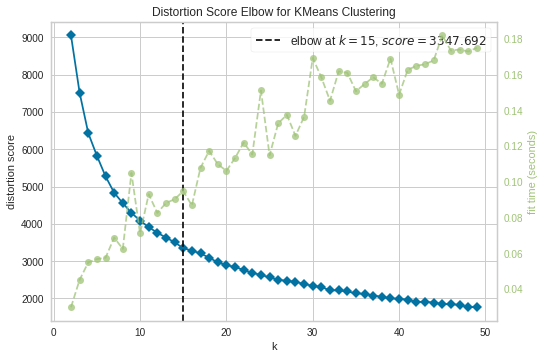

In [60]:
#Finding the optimal number of clusters using elbow method

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,50), timings= True)
visualizer.fit(pca_data)        # Fit data to visualizer
visualizer.show()

In [71]:
kmeans = KMeans(n_clusters=15)

In [72]:
clusters = kmeans.fit_predict(pca_data)
#clusters = kmeans.fit_predict(clustering_data.drop('Player', axis=1))

In [73]:
clustering_data = pd.concat([midfielders['Player'], pd.DataFrame(pca_data)], axis=1)

In [74]:
final_df = pd.concat([midfielders, pd.Series(clusters)], axis=1)

In [75]:
final_df[final_df['Player']=='Joshua Kimmich']

,Player,90s,Pos,Short Att,Medium Att,Long Att,Total PrgDist,KP,1/3,PPA,...,pAdj Pressures Def 3rd,pAdj Pressures Mid 3rd,pAdj Pressures Att 3rd,pAdj Blocks Blocks,pAdj Int,pAdj Clr,pAdj Tackles Def 3rd,pAdj Tackles Mid 3rd,pAdj Tackles Att 3rd,0
318,Joshua Kimmich,27.5,MF,33.563636,38.0,19.745455,513.709091,3.018182,7.927273,2.0,...,8.471555,15.758277,4.857815,2.843599,3.791465,1.718008,0.888625,1.125591,0.533175,2


In [76]:
final_df[final_df[0] == 2]

,Player,90s,Pos,Short Att,Medium Att,Long Att,Total PrgDist,KP,1/3,PPA,...,pAdj Pressures Def 3rd,pAdj Pressures Mid 3rd,pAdj Pressures Att 3rd,pAdj Blocks Blocks,pAdj Int,pAdj Clr,pAdj Tackles Def 3rd,pAdj Tackles Mid 3rd,pAdj Tackles Att 3rd,0
10,Thiago Alcántara,17.0,MF,28.941176,38.647059,17.647059,430.705882,1.647059,11.705882,1.294118,...,8.001446,15.165532,6.512805,2.419042,3.256403,1.674721,1.581681,2.884242,0.930401,2
216,Johan Gastien,30.5,MF,24.524590,34.393443,24.229508,520.754098,0.852459,6.655738,0.721311,...,5.737705,11.573770,2.491803,1.868852,2.459016,1.606557,0.786885,1.049180,0.098361,2
253,Bruno Guimarães,18.2,MF,29.010989,29.395604,13.681319,304.670330,1.813187,8.186813,1.758242,...,11.262552,16.078264,5.670112,1.786474,2.640874,1.553455,1.786474,2.563201,0.388364,2
271,Ander Herrera,12.1,MF,44.876033,30.495868,9.008264,310.413223,1.570248,8.595041,1.239669,...,6.287524,14.539898,7.466434,2.095841,3.143762,1.309901,0.916931,1.833861,0.785940,2
318,Joshua Kimmich,27.5,MF,33.563636,38.000000,19.745455,513.709091,3.018182,7.927273,2.000000,...,8.471555,15.758277,4.857815,2.843599,3.791465,1.718008,0.888625,1.125591,0.533175,2
335,Toni Kroos,23.4,MF,35.940171,35.213675,23.418803,535.982906,2.136752,11.495726,1.752137,...,6.424395,12.848790,3.842040,0.818795,1.070732,0.692827,0.881780,1.385654,0.503874,2
649,Marco Verratti,21.5,MF,49.116279,36.511628,10.279070,405.441860,1.348837,8.046512,2.093023,...,8.625239,19.462079,10.394519,2.801360,1.843000,0.663480,1.179520,2.432760,1.032080,2


As we can see, based on our eye test, we know that players like Joshua Kimmich, Toni Kroos, Marco Verratti, Thiago are all midfield dictators for their respective teams and hence, they are clustered in the same segment.

For reference, we can also check the player's FBref profile, which lists top 10 similar players and compare our classifications.

# Key points and limitations:

FBref's similarity tables classify players as midfielders, attacking midfielders/wingers etc. whereas its big 5 European league tables broadly lists them as MF, DF etc.

In [67]:
full_df['Pos'].unique()

array(['DF', 'MF', 'FW', 'MF,FW', 'FW,MF', 'GK', 'DF,MF', 'FW,DF',
       'MF,DF', 'DF,FW', 'GK,MF'], dtype=object)

The PCA captures only 80% of the variance in our data.

In [68]:
#Limitation
sum(pca.explained_variance_ratio_)

0.8069714601142411

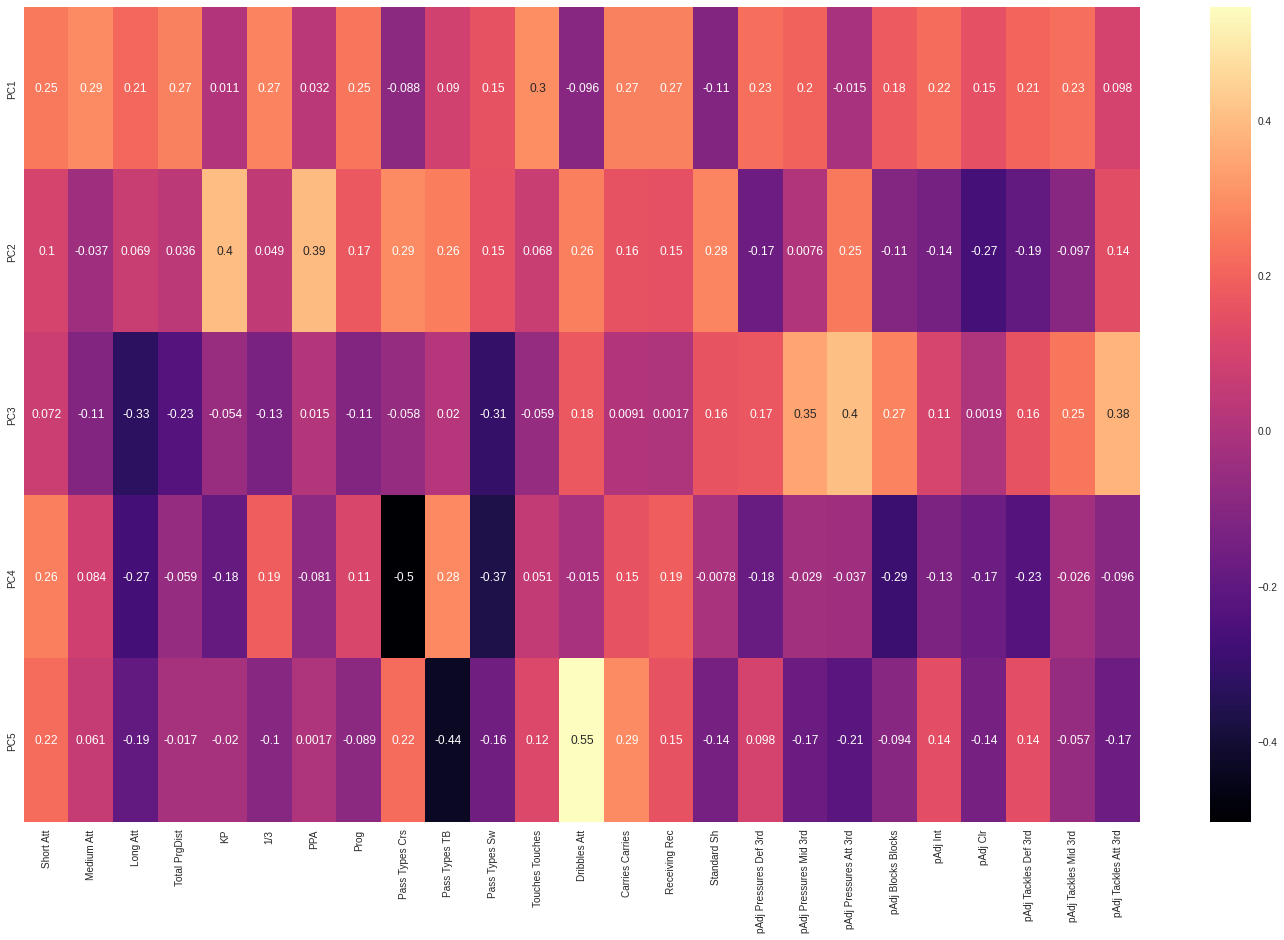

In [69]:
plt.figure(figsize=(25,15))
sns.heatmap(pca_df, annot=True, cmap='magma')

Furthermore, we have only used event-based data. A player's positional data is also important in analysing his/her playing style on the field.

# References:



```
https://statsbomb.com/articles/soccer/introducing-possession-adjusted-player-stats/

https://careyanalytics.wordpress.com/2020/04/30/a-closer-look-into-european-midfielder-playing-styles/

https://www.statsperform.com/resource/clustering-playing-styles-in-the-modern-day-full-back/

https://careyanalytics.wordpress.com/2020/05/26/assessing-midfielder-similarities-using-unsupervised-machine-learning/

https://www.americansocceranalysis.com/home/2020/3/3/clustering

https://www.americansocceranalysis.com/home/2019/3/11/using-k-means-to-learn-what-soccer-passing-tells-us-about-playing-styles

https://careyanalytics.wordpress.com/2018/02/22/quantifying-player-profiles-the-evolution-of-the-full-back/
```

